In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris, fetch_california_housing
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE
!pip install imbalanced-learn

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
URL = "C:\\Users\\ramya\\Downloads\\final_df.csv"

df = pd.read_csv(URL)
df

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,member_casual,started_at_day,started_at_month,started_at_hour,ride_time,ride_time_1,rides_in_minutes,start_date,Date,avg_temp
0,electric_bike,2023-01-01 00:01:58,2023-01-01 00:02:41,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.800000,...,casual,Sunday,January,0,0 days 00:00:43,2023-01-01 00:01:58,1.0,2023-01-01,2023-01-01,41.0
1,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,41.890847,...,member,Sunday,January,0,0 days 00:27:40,2023-01-01 00:02:06,28.0,2023-01-01,2023-01-01,41.0
2,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,42.001139,-87.661256,42.001044,...,casual,Sunday,January,0,0 days 00:03:57,2023-01-01 00:03:26,4.0,2023-01-01,2023-01-01,41.0
3,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,41.973815,...,casual,Sunday,January,0,0 days 00:09:49,2023-01-01 00:04:07,10.0,2023-01-01,2023-01-01,41.0
4,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,41.961588,...,member,Sunday,January,0,0 days 00:12:25,2023-01-01 00:04:27,13.0,2023-01-01,2023-01-01,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719600,electric_bike,2023-12-31 23:55:28,2024-01-01 00:24:15,McClurg Ct & Ohio St,TA1306000029,Fairbanks Ct & Grand Ave,TA1305000003,41.892036,-87.616815,41.891847,...,member,Sunday,December,23,0 days 00:28:47,2023-12-31 23:55:28,29.0,2023-12-31,2023-12-31,33.5
5719601,electric_bike,2023-12-31 23:56:28,2024-01-01 00:00:43,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886146,-87.624730,41.890000,...,casual,Sunday,December,23,0 days 00:04:15,2023-12-31 23:56:28,5.0,2023-12-31,2023-12-31,33.5
5719602,electric_bike,2023-12-31 23:57:01,2023-12-31 23:59:26,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886145,-87.624771,41.890000,...,member,Sunday,December,23,0 days 00:02:25,2023-12-31 23:57:01,3.0,2023-12-31,2023-12-31,33.5
5719603,electric_bike,2023-12-31 23:58:55,2024-01-01 00:06:08,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,Sheridan Rd & Montrose Ave,TA1307000107,41.961456,-87.676323,41.961670,...,casual,Sunday,December,23,0 days 00:07:13,2023-12-31 23:58:55,8.0,2023-12-31,2023-12-31,33.5


In [3]:
df['total_no_minutes'] = df['rides_in_minutes']

In [4]:
df

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,started_at_day,started_at_month,started_at_hour,ride_time,ride_time_1,rides_in_minutes,start_date,Date,avg_temp,total_no_minutes
0,electric_bike,2023-01-01 00:01:58,2023-01-01 00:02:41,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.800000,...,Sunday,January,0,0 days 00:00:43,2023-01-01 00:01:58,1.0,2023-01-01,2023-01-01,41.0,1.0
1,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,41.890847,...,Sunday,January,0,0 days 00:27:40,2023-01-01 00:02:06,28.0,2023-01-01,2023-01-01,41.0,28.0
2,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,42.001139,-87.661256,42.001044,...,Sunday,January,0,0 days 00:03:57,2023-01-01 00:03:26,4.0,2023-01-01,2023-01-01,41.0,4.0
3,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,41.973815,...,Sunday,January,0,0 days 00:09:49,2023-01-01 00:04:07,10.0,2023-01-01,2023-01-01,41.0,10.0
4,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,41.961588,...,Sunday,January,0,0 days 00:12:25,2023-01-01 00:04:27,13.0,2023-01-01,2023-01-01,41.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719600,electric_bike,2023-12-31 23:55:28,2024-01-01 00:24:15,McClurg Ct & Ohio St,TA1306000029,Fairbanks Ct & Grand Ave,TA1305000003,41.892036,-87.616815,41.891847,...,Sunday,December,23,0 days 00:28:47,2023-12-31 23:55:28,29.0,2023-12-31,2023-12-31,33.5,29.0
5719601,electric_bike,2023-12-31 23:56:28,2024-01-01 00:00:43,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886146,-87.624730,41.890000,...,Sunday,December,23,0 days 00:04:15,2023-12-31 23:56:28,5.0,2023-12-31,2023-12-31,33.5,5.0
5719602,electric_bike,2023-12-31 23:57:01,2023-12-31 23:59:26,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886145,-87.624771,41.890000,...,Sunday,December,23,0 days 00:02:25,2023-12-31 23:57:01,3.0,2023-12-31,2023-12-31,33.5,3.0
5719603,electric_bike,2023-12-31 23:58:55,2024-01-01 00:06:08,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,Sheridan Rd & Montrose Ave,TA1307000107,41.961456,-87.676323,41.961670,...,Sunday,December,23,0 days 00:07:13,2023-12-31 23:58:55,8.0,2023-12-31,2023-12-31,33.5,8.0


In [5]:
ml_df = df.groupby(["start_date","avg_temp","started_at_day","started_at_month"]).agg({"rides_in_minutes":"mean", "total_no_minutes":"sum", "Date":"count"})

ml_df = pd.DataFrame(ml_df).reset_index()

In [6]:
ml_df

,start_date,avg_temp,started_at_day,started_at_month,rides_in_minutes,total_no_minutes,Date
0,2023-01-01,41.0,Sunday,January,26.487050,136011.0,5135
1,2023-01-02,37.5,Monday,January,18.184129,100140.0,5507
2,2023-01-03,43.5,Tuesday,January,11.942852,61231.0,5127
3,2023-01-04,38.5,Wednesday,January,13.090208,95048.0,7261
4,2023-01-05,33.0,Thursday,January,13.239044,87007.0,6572
...,...,...,...,...,...,...,...
360,2023-12-27,36.0,Wednesday,December,13.979514,83933.0,6004
361,2023-12-28,38.0,Thursday,December,14.148548,55052.0,3891
362,2023-12-29,35.5,Friday,December,13.494776,65868.0,4881
363,2023-12-30,32.0,Saturday,December,14.458161,73433.0,5079


In [7]:
ml_df.to_csv("ml_df.csv")

In [8]:
ml_df.rename(columns={"rides_in_minutes":"avg_ride_minutres", "Date":"no_of_rides"}, inplace=True)

In [9]:
ml_df

,start_date,avg_temp,started_at_day,started_at_month,avg_ride_minutres,total_no_minutes,no_of_rides
0,2023-01-01,41.0,Sunday,January,26.487050,136011.0,5135
1,2023-01-02,37.5,Monday,January,18.184129,100140.0,5507
2,2023-01-03,43.5,Tuesday,January,11.942852,61231.0,5127
3,2023-01-04,38.5,Wednesday,January,13.090208,95048.0,7261
4,2023-01-05,33.0,Thursday,January,13.239044,87007.0,6572
...,...,...,...,...,...,...,...
360,2023-12-27,36.0,Wednesday,December,13.979514,83933.0,6004
361,2023-12-28,38.0,Thursday,December,14.148548,55052.0,3891
362,2023-12-29,35.5,Friday,December,13.494776,65868.0,4881
363,2023-12-30,32.0,Saturday,December,14.458161,73433.0,5079


In [10]:
features = ml_df.drop(columns = ['no_of_rides', "start_date", "avg_ride_minutres", "total_no_minutes"])
target = ml_df['no_of_rides']

In [11]:
cat_f = features[["started_at_day","started_at_month"]]
cat_f

,started_at_day,started_at_month
0,Sunday,January
1,Monday,January
2,Tuesday,January
3,Wednesday,January
4,Thursday,January
...,...,...
360,Wednesday,December
361,Thursday,December
362,Friday,December
363,Saturday,December


In [12]:
num_f = features.drop(columns =["started_at_day","started_at_month"])
num_f

,avg_temp
0,41.0
1,37.5
2,43.5
3,38.5
4,33.0
...,...
360,36.0
361,38.0
362,35.5
363,32.0


In [13]:
cat_f = pd.get_dummies(cat_f, drop_first = True)
cat_f

,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday,started_at_month_August,started_at_month_December,started_at_month_February,started_at_month_January,started_at_month_July,started_at_month_June,started_at_month_March,started_at_month_May,started_at_month_November,started_at_month_October,started_at_month_September
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
361,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
362,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
363,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [14]:
features = pd.concat([cat_f,num_f], axis = 1)
features

,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday,started_at_month_August,started_at_month_December,started_at_month_February,started_at_month_January,started_at_month_July,started_at_month_June,started_at_month_March,started_at_month_May,started_at_month_November,started_at_month_October,started_at_month_September,avg_temp
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,41.0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,37.5
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,43.5
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,38.5
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,36.0
361,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,38.0
362,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,35.5
363,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,32.0


In [15]:
target

0      5135
1      5507
2      5127
3      7261
4      6572
       ... 
360    6004
361    3891
362    4881
363    5079
364    2998
Name: no_of_rides, Length: 365, dtype: int64

In [16]:
df_1 = pd.concat([features, target], axis = 1)
df_1

,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday,started_at_month_August,started_at_month_December,started_at_month_February,started_at_month_January,started_at_month_July,started_at_month_June,started_at_month_March,started_at_month_May,started_at_month_November,started_at_month_October,started_at_month_September,avg_temp,no_of_rides
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,41.0,5135
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,37.5,5507
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,43.5,5127
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,38.5,7261
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,33.0,6572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,36.0,6004
361,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,38.0,3891
362,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,35.5,4881
363,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,32.0,5079


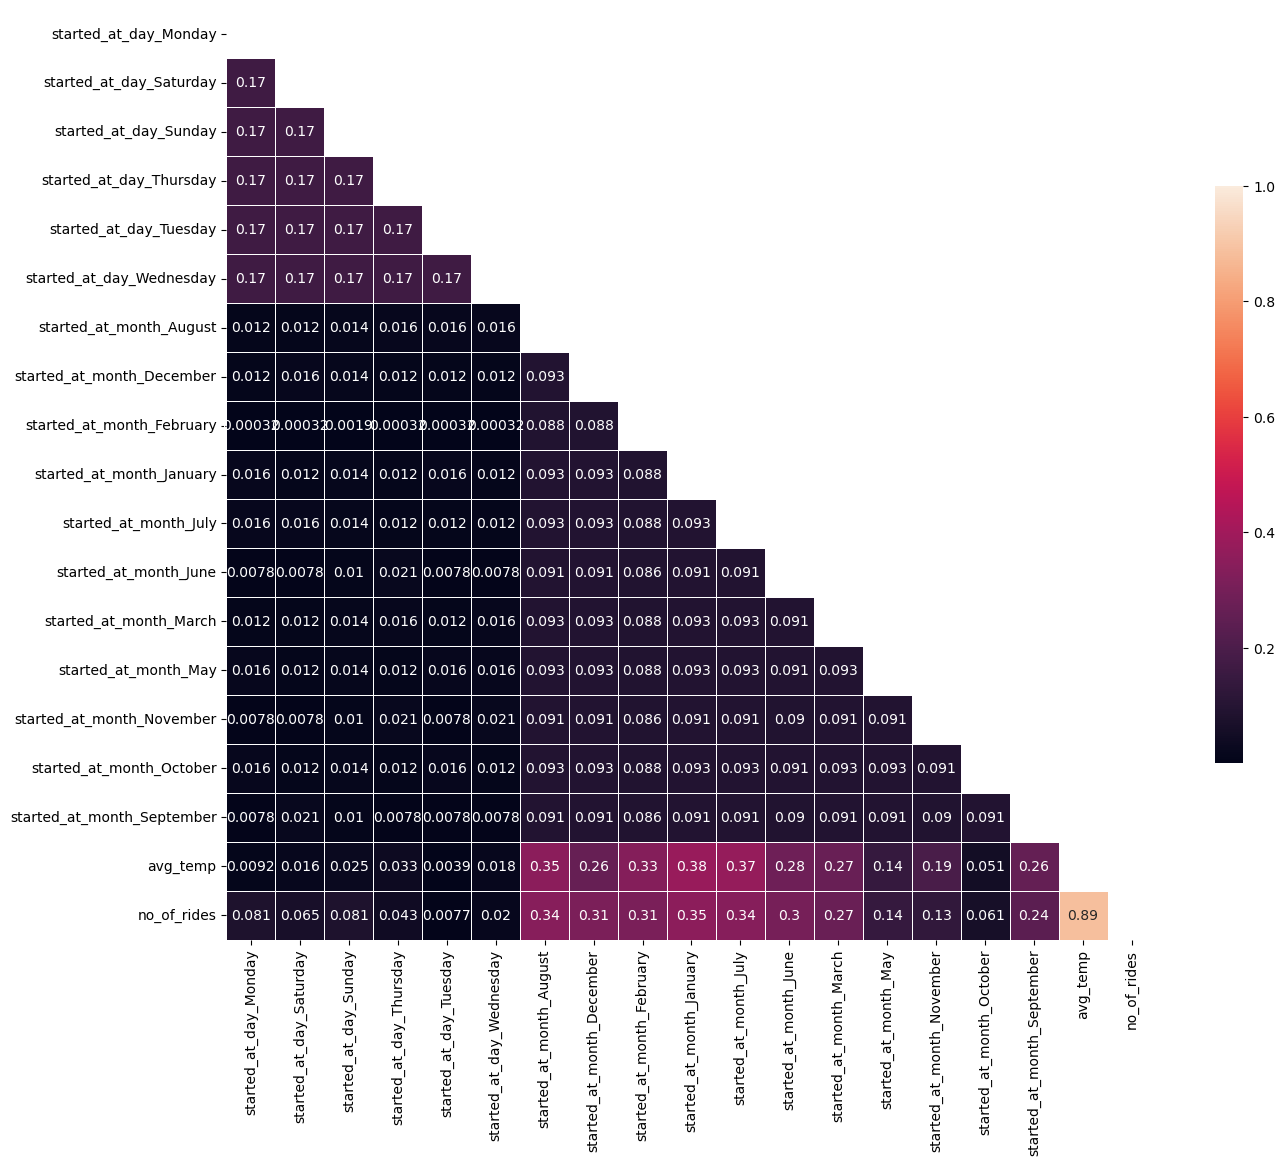

In [17]:
corr = np.abs(df_1.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)

In [19]:
normalizer = MinMaxScaler()

In [20]:
normalizer.fit(x_train)

MinMaxScaler()

In [21]:
x_train_scal = normalizer.transform(x_train)
x_train_scal = pd.DataFrame(x_train_scal, columns = x_train.columns)
x_train_scal

,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday,started_at_month_August,started_at_month_December,started_at_month_February,started_at_month_January,started_at_month_July,started_at_month_June,started_at_month_March,started_at_month_May,started_at_month_November,started_at_month_October,started_at_month_September,avg_temp
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.618182
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.430303
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.703030
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.581818
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.503030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.496970
288,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.787879
289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.593939
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000


In [22]:
y_train

295    16825
63      8246
241    24439
306    14872
317    17092
       ...  
323     9183
192    14464
117    15403
47      4545
172    26097
Name: no_of_rides, Length: 292, dtype: int64

In [23]:
x_test_scal = normalizer.transform(x_test)
x_test_scal = pd.DataFrame(x_test_scal, columns = x_test.columns)
x_test_scal

,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday,started_at_month_August,started_at_month_December,started_at_month_February,started_at_month_January,started_at_month_July,started_at_month_June,started_at_month_March,started_at_month_May,started_at_month_November,started_at_month_October,started_at_month_September,avg_temp
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369697
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.672727
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.236364
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.436364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.842424
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.775758
70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.490909
71,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.806061


# Using KNN

In [194]:
knn = KNeighborsRegressor(n_neighbors = 5)

In [195]:
knn.fit(x_train_scal, y_train)

KNeighborsRegressor()

In [196]:
knn.score(x_test_scal, y_test)

0.755348372606342

# Using Linear Regression

In [197]:
lin_reg = LinearRegression()

In [198]:
lin_reg.fit(x_train_scal, y_train)

LinearRegression()

In [199]:
lin_reg.score(x_test_scal, y_test)

0.8401687329946306

# Using Decision Tree

In [200]:
tree = DecisionTreeRegressor(max_depth=10)

In [201]:
tree.fit(x_train_scal, y_train)

DecisionTreeRegressor(max_depth=10)

In [202]:
tree.score(x_test_scal, y_test)

0.7427017762850685

# Bagging(Ensembled Methods)

In [203]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=30),
                               n_estimators=100)

In [204]:
bagging_reg.fit(x_train_scal, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=30),
                 n_estimators=100)

In [205]:
bagging_reg.score(x_test_scal, y_test)

0.8318078358971384

# Using Hyperparameters for Bagging

In [24]:
param_grid = { 'n_estimators': [10, 50, 100], 'max_samples': [0.5, 0.7, 1.0], 'max_features': [0.5, 0.7, 1.0]}

In [25]:
base_estimator = DecisionTreeRegressor()
bagging = BaggingRegressor(base_estimator=base_estimator)

In [26]:
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scal, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [27]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

{'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}

In [28]:
best_model.score(x_test_scal, y_test)

0.8470051761957365

In [30]:
pred = best_model.predict(x_test_scal)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2", best_model.score(x_test_scal, y_test))

MAE 2464.122910958904
RMSE 3205.8494469001503
R2 0.8470051761957365


- This is the highest accuracy of 0.853 using bagging regressor modelwith these parameters:
- max_features: 1.0, max_samples: 0.5, n_estimators: 100, Cross_validation: 5

# Random Forest

In [206]:
forest = RandomForestRegressor(n_estimators = 100, max_depth = 20)

In [207]:
forest.fit(x_train_scal, y_train)

RandomForestRegressor(max_depth=20)

In [208]:
pred = forest.predict(x_test_scal)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2", forest.score(x_test_scal, y_test))

MAE 2598.749107305936
RMSE 3417.1005678073334
R2 0.8261774916719334


# AdaBoost

In [209]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=30), n_estimators = 100)

In [210]:
ada_reg.fit(x_train_scal, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30),
                  n_estimators=100)

In [211]:
pred = ada_reg.predict(x_test_scal)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2", ada_reg.score(x_test_scal, y_test))

MAE 2559.5778030141714
RMSE 3393.270408610853
R2 0.8285934431334285


# Gradient Boosting

In [212]:
gb_reg = GradientBoostingRegressor(max_depth = 20, n_estimators = 100)

In [213]:
gb_reg.fit(x_train_scal, y_train)

GradientBoostingRegressor(max_depth=20)

In [214]:
pred = gb_reg.predict(x_test_scal)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2", gb_reg.score(x_test_scal, y_test))

MAE 3155.48871896491
RMSE 4303.475306327598
R2 0.7243048525644935


In [ ]:
###################################

# Time Series Model

In [2]:
path_2020 = "C:\\Users\\ramya\\Downloads\\monthly_rides_df_2020.csv"
path_2021 = "C:\\Users\\ramya\\Downloads\\monthly_rides_df_2021.csv"
path_2022 = "C:\\Users\\ramya\\Downloads\\monthly_rides_df_2022.csv"
path_2023 = "C:\\Users\\ramya\\Downloads\\monthly_rides_df_2023.csv"

In [5]:
df_2020 = pd.read_csv(path_2020)
df_2021 = pd.read_csv(path_2021)
df_2022 = pd.read_csv(path_2022)
df_2023 = pd.read_csv(path_2023)

In [7]:
df = [df_2020, df_2021, df_2022, df_2023]
df_ts = pd.concat(df, axis = 0)

In [8]:
df_ts

,month,ride_count
0,2020-01-01,143884
1,2020-02-01,139584
2,2020-03-01,143302
3,2020-04-01,84725
4,2020-05-01,200102
5,2020-06-01,342536
6,2020-07-01,549735
7,2020-08-01,619592
8,2020-09-01,530826
9,2020-10-01,386742


In [9]:
df_ts.reset_index(inplace = True, drop = True)

In [10]:
df_ts

,month,ride_count
0,2020-01-01,143884
1,2020-02-01,139584
2,2020-03-01,143302
3,2020-04-01,84725
4,2020-05-01,200102
5,2020-06-01,342536
6,2020-07-01,549735
7,2020-08-01,619592
8,2020-09-01,530826
9,2020-10-01,386742


In [11]:
df_ts.dtypes

month         object
ride_count     int64
dtype: object

In [15]:
df_ts.to_csv("df_ts.csv")

# Accident Data

In [3]:
Accident_URL = "C:\\Users\\ramya\\Downloads\\Traffic_Crashes_-_People_20240527.csv"

accident_df = pd.read_csv(Accident_URL)
accident_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O1558342,BICYCLE,b131d8e80f329ed77ed279badb1d3c60f06b108c7f63c7...,NaN,4/19/2023 13:45,NaN,CHICAGO,IL,60617.0,M,...,NaN,UNKNOWN,UNKNOWN,NORMAL,CROSSING - NO CONTROLS (AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
1,O1558486,BICYCLE,bfce8b092f549a5785e9249d266bb88960d2dc54a08717...,NaN,4/19/2023 17:20,NaN,CHICAGO,IL,60657.0,F,...,NaN,NONE,UNKNOWN,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED,NaN,NaN
2,O1665599,BICYCLE,f13124105d3c64027fb0036a2ca580395d9de1c87c4113...,NaN,9/21/2023 8:12,NaN,CICERO,IL,60804.0,M,...,NaN,FAILED TO YIELD,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,OTHER LIGHT SOURCE USED,IN ROADWAY,NaN,NaN,NaN
3,O1665706,BICYCLE,877fb68e5a0691d75f11401fd172bf2dbcfa9c5ba16933...,NaN,9/21/2023 9:20,NaN,OAK LAWN,NaN,NaN,M,...,NaN,NONE,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED,NaN,NaN
4,O1568916,BICYCLE,d313bbafece051a48e92c3de2fd8bbad529bec42fbd1db...,NaN,5/5/2023 8:08,NaN,CHICAGO,IL,60626.0,M,...,NaN,FAILED TO YIELD,UNKNOWN,NORMAL,TURNING LEFT,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,O1742390,BICYCLE,3f4eafd97bff0aa3d356e81699fa4ce7e64f38cd5e77ad...,NaN,10/14/2023 22:00,NaN,CHICAGO,IL,NaN,F,...,NaN,NONE,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,REFLECTIVE MATERIAL,BIKEWAY,TEST NOT OFFERED,NaN,NaN
2012,O1743288,BICYCLE,cffdc80acb3ba4708216d372e5c9b96b2e56bfcced8ea1...,NaN,12/20/2023 20:15,NaN,CHICAGO,IL,NaN,F,...,NaN,UNKNOWN,UNKNOWN,NORMAL,CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
2013,O1744236,BICYCLE,826df47aebca62052e0820cc30ab3054a5026a63de2f48...,NaN,12/22/2023 18:15,NaN,CHICAGO,IL,60639.0,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NO ACTION,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED,NaN,NaN
2014,O1757350,BICYCLE,1e47752a6e5ef4bf88cad14768828e11e96de6f8364726...,NaN,11/29/2023 18:03,NaN,CHICAGO,IL,60605.0,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED,NaN,NaN


In [4]:
accident_df.isna().sum()

PERSON_ID                   0
PERSON_TYPE                 0
CRASH_RECORD_ID             0
VEHICLE_ID               2016
CRASH_DATE                  0
SEAT_NO                  2016
CITY                      286
STATE                     296
ZIPCODE                   515
SEX                        29
AGE                       282
DRIVERS_LICENSE_STATE    2016
DRIVERS_LICENSE_CLASS    2016
SAFETY_EQUIPMENT            0
AIRBAG_DEPLOYED          2016
EJECTION                   92
INJURY_CLASSIFICATION       0
HOSPITAL                 1155
EMS_AGENCY               1274
EMS_RUN_NO               2016
DRIVER_ACTION              42
DRIVER_VISION              61
PHYSICAL_CONDITION         46
PEDPEDAL_ACTION             0
PEDPEDAL_VISIBILITY         0
PEDPEDAL_LOCATION           0
BAC_RESULT                 86
BAC_RESULT VALUE         2016
CELL_PHONE_USE           2016
dtype: int64

In [5]:
accident_df.drop(columns = ['SEAT_NO', 'VEHICLE_ID', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'AIRBAG_DEPLOYED', 'EMS_RUN_NO', 'DRIVER_ACTION', 'BAC_RESULT VALUE', 'CELL_PHONE_USE'], inplace = True)

In [6]:
accident_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT
0,O1558342,BICYCLE,b131d8e80f329ed77ed279badb1d3c60f06b108c7f63c7...,4/19/2023 13:45,CHICAGO,IL,60617.0,M,43.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,UNKNOWN,NORMAL,CROSSING - NO CONTROLS (AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
1,O1558486,BICYCLE,bfce8b092f549a5785e9249d266bb88960d2dc54a08717...,4/19/2023 17:20,CHICAGO,IL,60657.0,F,0.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),NONE,NO INDICATION OF INJURY,NaN,NaN,UNKNOWN,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED
2,O1665599,BICYCLE,f13124105d3c64027fb0036a2ca580395d9de1c87c4113...,9/21/2023 8:12,CICERO,IL,60804.0,M,54.0,HELMET NOT USED,NONE,NO INDICATION OF INJURY,NaN,NaN,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,OTHER LIGHT SOURCE USED,IN ROADWAY,NaN
3,O1665706,BICYCLE,877fb68e5a0691d75f11401fd172bf2dbcfa9c5ba16933...,9/21/2023 9:20,OAK LAWN,NaN,NaN,M,75.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),TOTALLY EJECTED,INCAPACITATING INJURY,CHRIST,5,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED
4,O1568916,BICYCLE,d313bbafece051a48e92c3de2fd8bbad529bec42fbd1db...,5/5/2023 8:08,CHICAGO,IL,60626.0,M,19.0,HELMET NOT USED,NONE,NONINCAPACITATING INJURY,NaN,NaN,UNKNOWN,NORMAL,TURNING LEFT,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,O1742390,BICYCLE,3f4eafd97bff0aa3d356e81699fa4ce7e64f38cd5e77ad...,10/14/2023 22:00,CHICAGO,IL,NaN,F,19.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),NaN,"REPORTED, NOT EVIDENT",STROGER HOSPITAL,NaN,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,REFLECTIVE MATERIAL,BIKEWAY,TEST NOT OFFERED
2012,O1743288,BICYCLE,cffdc80acb3ba4708216d372e5c9b96b2e56bfcced8ea1...,12/20/2023 20:15,CHICAGO,IL,NaN,F,13.0,HELMET NOT USED,NONE,NONINCAPACITATING INJURY,HUMBOLDT PARK HEALTH,CFD AMB #3,UNKNOWN,NORMAL,CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
2013,O1744236,BICYCLE,826df47aebca62052e0820cc30ab3054a5026a63de2f48...,12/22/2023 18:15,CHICAGO,IL,60639.0,M,29.0,HELMET NOT USED,TOTALLY EJECTED,NONINCAPACITATING INJURY,ST MARYS,NaN,NOT OBSCURED,NORMAL,NO ACTION,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED
2014,O1757350,BICYCLE,1e47752a6e5ef4bf88cad14768828e11e96de6f8364726...,11/29/2023 18:03,CHICAGO,IL,60605.0,M,26.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),UNKNOWN,NONINCAPACITATING INJURY,ILLINOIS MASONIC,62,UNKNOWN,UNKNOWN,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED


In [7]:
city_counts = accident_df['CITY'].value_counts().sort_index()

In [8]:
city_counts.head(60)

ANCHORAGE                1
ARCAIDA                  1
ASHEVILLE                1
ATLANTA                  1
AURORA                   2
AUSTIN                   1
BARRINGTON               1
BARTLETT                 1
BATON ROUGE              1
BELLEVUE                 1
BELMONT                  1
BERWYN                   2
BETHEL PARK              1
BLOOMINGTON              2
BOLINGBROOK              1
BOULDER                  1
BRIDGEVIEW               1
BUDA                     1
CAROL STREAM             2
CHAMPAIGN                2
CHARLESTON               1
CHCIAGO                  4
CHCICAGO                 1
CHGICAGO                 1
CHGO                    14
CHHICAGO                 1
CHIACGO                  1
CHICAG                   1
CHICAGAO                 1
CHICAGI                  3
CHICAGO               1498
CHICAGOQ                 1
CHICAGO`                 1
CHICAO                   1
CHICG                    1
CICERO                   5
CINCINATTI               1
C

In [9]:
cities = ['CHCIAGO' ,'CHCICAGO', 'CHGICAGO', 'CHGO', 'CHHICAGO', 'CHIACGO', 'CHICAG' , 'CHICAGAO', 'CHICAGI', 'CHICAGO', 'CHICAGOQ', 'CHICAGO`', 'CHICAO', 'CHICG']

In [10]:
accident_df = accident_df[accident_df['CITY'].isin(cities)]
accident_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT
0,O1558342,BICYCLE,b131d8e80f329ed77ed279badb1d3c60f06b108c7f63c7...,4/19/2023 13:45,CHICAGO,IL,60617.0,M,43.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,UNKNOWN,NORMAL,CROSSING - NO CONTROLS (AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
1,O1558486,BICYCLE,bfce8b092f549a5785e9249d266bb88960d2dc54a08717...,4/19/2023 17:20,CHICAGO,IL,60657.0,F,0.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),NONE,NO INDICATION OF INJURY,NaN,NaN,UNKNOWN,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED
4,O1568916,BICYCLE,d313bbafece051a48e92c3de2fd8bbad529bec42fbd1db...,5/5/2023 8:08,CHICAGO,IL,60626.0,M,19.0,HELMET NOT USED,NONE,NONINCAPACITATING INJURY,NaN,NaN,UNKNOWN,NORMAL,TURNING LEFT,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
5,O1665711,BICYCLE,a5393326d8f3a5c6a4cb2a26efdb4bfead74a915dce707...,9/21/2023 11:03,CHICAGO,IL,60614.0,M,37.0,HELMET NOT USED,TOTALLY EJECTED,NONINCAPACITATING INJURY,NaN,NaN,NOT OBSCURED,NORMAL,CROSSING - AGAINST SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
6,O1666065,BICYCLE,0bdb3396e7f9903245d1800e8b00c767742acdb5fe3507...,9/21/2023 18:30,CHICAGO,IL,60612.0,M,18.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),NONE,NO INDICATION OF INJURY,NaN,NaN,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,O1742390,BICYCLE,3f4eafd97bff0aa3d356e81699fa4ce7e64f38cd5e77ad...,10/14/2023 22:00,CHICAGO,IL,NaN,F,19.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),NaN,"REPORTED, NOT EVIDENT",STROGER HOSPITAL,NaN,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,REFLECTIVE MATERIAL,BIKEWAY,TEST NOT OFFERED
2012,O1743288,BICYCLE,cffdc80acb3ba4708216d372e5c9b96b2e56bfcced8ea1...,12/20/2023 20:15,CHICAGO,IL,NaN,F,13.0,HELMET NOT USED,NONE,NONINCAPACITATING INJURY,HUMBOLDT PARK HEALTH,CFD AMB #3,UNKNOWN,NORMAL,CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
2013,O1744236,BICYCLE,826df47aebca62052e0820cc30ab3054a5026a63de2f48...,12/22/2023 18:15,CHICAGO,IL,60639.0,M,29.0,HELMET NOT USED,TOTALLY EJECTED,NONINCAPACITATING INJURY,ST MARYS,NaN,NOT OBSCURED,NORMAL,NO ACTION,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED
2014,O1757350,BICYCLE,1e47752a6e5ef4bf88cad14768828e11e96de6f8364726...,11/29/2023 18:03,CHICAGO,IL,60605.0,M,26.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),UNKNOWN,NONINCAPACITATING INJURY,ILLINOIS MASONIC,62,UNKNOWN,UNKNOWN,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED


In [11]:
accident_df.to_csv('accident_df_final.csv')

In [48]:
zip_codes = accident_df['ZIPCODE'].value_counts()
zip_codes

60647.0    76
60608.0    67
60618.0    66
60641.0    62
60640.0    62
           ..
60064.0     1
66023.0     1
60123.0     1
60061.0     1
60633.0     1
Name: ZIPCODE, Length: 63, dtype: int64

In [49]:
zip_codes.to_csv("zip_codes.csv")

In [39]:
accident_df.dtypes

PERSON_ID                 object
PERSON_TYPE               object
CRASH_RECORD_ID           object
CRASH_DATE                object
CITY                      object
STATE                     object
ZIPCODE                  float64
SEX                       object
AGE                      float64
SAFETY_EQUIPMENT          object
EJECTION                  object
INJURY_CLASSIFICATION     object
HOSPITAL                  object
EMS_AGENCY                object
DRIVER_VISION             object
PHYSICAL_CONDITION        object
PEDPEDAL_ACTION           object
PEDPEDAL_VISIBILITY       object
PEDPEDAL_LOCATION         object
BAC_RESULT                object
dtype: object

- Go to "Bootcamp_Project_Notebook_2" to work on the accident dataset.

# Accidents prediction model

In [70]:
accident_final_df = pd.read_csv("C:\\Users\\ramya\\Downloads\\accidents_final_dataset.csv")

In [71]:
accident_final_df

,Unnamed: 0,Date,DISTRICT,no_of_accidents,avg_temp,season,started_at_day,no_of_rides
0,0,1/1/2023,1,0,41.0,Winter,Sunday,534.0
1,1,1/1/2023,10,0,41.0,Winter,Sunday,23.0
2,2,1/1/2023,11,0,41.0,Winter,Sunday,40.0
3,3,1/1/2023,12,0,41.0,Winter,Sunday,266.0
4,4,1/1/2023,14,0,41.0,Winter,Sunday,453.0
...,...,...,...,...,...,...,...,...
8025,8025,12/31/2023,5,0,33.5,Winter,Sunday,5.0
8026,8026,12/31/2023,6,0,33.5,Winter,Sunday,9.0
8027,8027,12/31/2023,7,0,33.5,Winter,Sunday,6.0
8028,8028,12/31/2023,8,0,33.5,Winter,Sunday,11.0


In [97]:
accident_final_df['no_of_accidents'].value_counts()

0    6961
1     887
2     148
3      29
4       5
Name: no_of_accidents, dtype: int64

In [72]:
accident_final_df.dtypes

Unnamed: 0           int64
Date                object
DISTRICT            object
no_of_accidents      int64
avg_temp           float64
season              object
started_at_day      object
no_of_rides        float64
dtype: object

In [73]:
day_to_binary = {'Saturday': 1,'Sunday': 1,'Monday': 0,'Tuesday': 0,'Wednesday': 0,'Thursday': 0,'Friday': 0}
accident_final_df['is_weekend'] = accident_final_df['started_at_day'].map(day_to_binary)

In [74]:
seasons_to_binary = {'Winter': 3,'Fall': 2,'Spring': 1,'Summer': 0}
accident_final_df['seasons'] = accident_final_df['season'].map(seasons_to_binary)

In [75]:
accident_final_df.isna().sum()

Unnamed: 0         0
Date               0
DISTRICT           0
no_of_accidents    0
avg_temp           2
season             2
started_at_day     2
no_of_rides        2
is_weekend         2
seasons            2
dtype: int64

In [76]:
accident_final_df.avg_temp.fillna(method = "bfill", inplace = True)
accident_final_df.season.fillna(method = "bfill", inplace = True)
accident_final_df.started_at_day.fillna(method = "bfill", inplace = True)
accident_final_df.is_weekend.fillna(method = "bfill", inplace = True)
accident_final_df.seasons.fillna(method = "bfill", inplace = True)
accident_final_df.no_of_rides.fillna(0, inplace = True)

In [77]:
accident_final_df.isna().sum()

Unnamed: 0         0
Date               0
DISTRICT           0
no_of_accidents    0
avg_temp           0
season             0
started_at_day     0
no_of_rides        0
is_weekend         0
seasons            0
dtype: int64

In [78]:
accident_final_df['is_weekend'] = accident_final_df['is_weekend'].astype(int)

In [79]:
accident_final_df.dtypes

Unnamed: 0           int64
Date                object
DISTRICT            object
no_of_accidents      int64
avg_temp           float64
season              object
started_at_day      object
no_of_rides        float64
is_weekend           int32
seasons            float64
dtype: object

In [80]:
accident_ml = accident_final_df.drop(columns = ['Unnamed: 0','Date','season'])

In [81]:
accident_ml.dtypes

DISTRICT            object
no_of_accidents      int64
avg_temp           float64
started_at_day      object
no_of_rides        float64
is_weekend           int32
seasons            float64
dtype: object

In [98]:
accident_ml

,DISTRICT,no_of_accidents,avg_temp,started_at_day,no_of_rides,is_weekend,seasons
0,1,0,41.0,Sunday,534.0,1,3.0
1,10,0,41.0,Sunday,23.0,1,3.0
2,11,0,41.0,Sunday,40.0,1,3.0
3,12,0,41.0,Sunday,266.0,1,3.0
4,14,0,41.0,Sunday,453.0,1,3.0
...,...,...,...,...,...,...,...
8025,5,0,33.5,Sunday,5.0,1,3.0
8026,6,0,33.5,Sunday,9.0,1,3.0
8027,7,0,33.5,Sunday,6.0,1,3.0
8028,8,0,33.5,Sunday,11.0,1,3.0


In [82]:
features_acc = accident_ml.drop(columns = ['no_of_accidents'])
target_acc = accident_ml['no_of_accidents']

In [84]:
cat_f_acc = features_acc[['DISTRICT', 'started_at_day']]
cat_f_acc

,DISTRICT,started_at_day
0,1,Sunday
1,10,Sunday
2,11,Sunday
3,12,Sunday
4,14,Sunday
...,...,...
8025,5,Sunday
8026,6,Sunday
8027,7,Sunday
8028,8,Sunday


In [88]:
num_f_acc = features_acc.drop(columns =['DISTRICT', 'started_at_day'])
num_f_acc

,avg_temp,no_of_rides,is_weekend,seasons
0,41.0,534.0,1,3.0
1,41.0,23.0,1,3.0
2,41.0,40.0,1,3.0
3,41.0,266.0,1,3.0
4,41.0,453.0,1,3.0
...,...,...,...,...
8025,33.5,5.0,1,3.0
8026,33.5,9.0,1,3.0
8027,33.5,6.0,1,3.0
8028,33.5,11.0,1,3.0


In [87]:
cat_f_acc = pd.get_dummies(cat_f_acc, drop_first = True)
cat_f_acc

,DISTRICT_10,DISTRICT_11,DISTRICT_12,DISTRICT_14,DISTRICT_15,DISTRICT_16,DISTRICT_17,DISTRICT_18,DISTRICT_19,DISTRICT_2,...,DISTRICT_6,DISTRICT_7,DISTRICT_8,DISTRICT_Headquarters,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8026,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8027,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8028,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [89]:
features_acc = pd.concat([cat_f_acc,num_f_acc], axis = 1)
features_acc

,DISTRICT_10,DISTRICT_11,DISTRICT_12,DISTRICT_14,DISTRICT_15,DISTRICT_16,DISTRICT_17,DISTRICT_18,DISTRICT_19,DISTRICT_2,...,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday,avg_temp,no_of_rides,is_weekend,seasons
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,41.0,534.0,1,3.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,41.0,23.0,1,3.0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,41.0,40.0,1,3.0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,41.0,266.0,1,3.0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,41.0,453.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,33.5,5.0,1,3.0
8026,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,33.5,9.0,1,3.0
8027,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,33.5,6.0,1,3.0
8028,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,33.5,11.0,1,3.0


In [90]:
target_acc

0       0
1       0
2       0
3       0
4       0
       ..
8025    0
8026    0
8027    0
8028    0
8029    0
Name: no_of_accidents, Length: 8030, dtype: int64

In [247]:
correlation = pd.concat([features_acc, target_acc], axis=1)

In [91]:
x_train_acc, x_test_acc, y_train_acc, y_test_acc = train_test_split(features_acc, target_acc, test_size = 0.20, random_state = 0)

In [92]:
normalizer = MinMaxScaler()

normalizer.fit(x_train_acc)

MinMaxScaler()

In [93]:
x_train_acc_scal = normalizer.transform(x_train_acc)
x_train_acc_scal = pd.DataFrame(x_train_acc_scal, columns = x_train_acc.columns)
x_train_acc_scal

,DISTRICT_10,DISTRICT_11,DISTRICT_12,DISTRICT_14,DISTRICT_15,DISTRICT_16,DISTRICT_17,DISTRICT_18,DISTRICT_19,DISTRICT_2,...,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday,avg_temp,no_of_rides,is_weekend,seasons
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.884848,0.073600,0.0,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.745455,0.026337,0.0,0.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.878788,0.815722,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.400000,0.056652,0.0,1.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.636364,0.044239,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6419,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.830303,0.095401,1.0,0.000000
6420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.781818,0.647120,0.0,0.333333
6421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.351515,0.063574,0.0,1.000000
6422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.557576,0.025382,1.0,0.333333


In [94]:
x_test_acc_scal = normalizer.transform(x_test_acc)
x_test_acc_scal = pd.DataFrame(x_test_acc_scal, columns = x_test_acc.columns)
x_test_acc_scal

,DISTRICT_10,DISTRICT_11,DISTRICT_12,DISTRICT_14,DISTRICT_15,DISTRICT_16,DISTRICT_17,DISTRICT_18,DISTRICT_19,DISTRICT_2,...,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday,avg_temp,no_of_rides,is_weekend,seasons
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.703030,0.001591,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.533333,0.001353,1.0,0.333333
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.636364,0.142027,0.0,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.878788,0.001432,0.0,0.000000
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.327273,0.072724,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.769697,0.232416,0.0,0.666667
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.818182,0.033736,0.0,0.000000
1603,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.884848,0.016630,0.0,0.000000
1604,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.751515,0.001273,0.0,0.333333


# Using KNN

In [96]:
knn_acc = KNeighborsRegressor(n_neighbors = 10)

knn_acc.fit(x_train_acc_scal, y_train_acc)

knn_acc.predict(x_test_acc_scal)

knn_acc.score(x_test_acc_scal, y_test_acc)

0.0028144399031216905

# Using Classification

In [99]:
accidents_binary = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
accident_ml['no_of_accidents'] = accident_ml['no_of_accidents'].map(accidents_binary)

In [101]:
accident_ml['no_of_accidents'].value_counts()

0    6961
1    1069
Name: no_of_accidents, dtype: int64

In [102]:
accident_ml.dtypes

DISTRICT            object
no_of_accidents      int64
avg_temp           float64
started_at_day      object
no_of_rides        float64
is_weekend           int32
seasons            float64
dtype: object

In [103]:
features_acc = accident_ml.drop(columns = ['no_of_accidents'])
target_acc = accident_ml['no_of_accidents']

cat_f_acc = features_acc[['DISTRICT', 'started_at_day']]
cat_f_acc

num_f_acc = features_acc.drop(columns =['DISTRICT', 'started_at_day'])
num_f_acc

cat_f_acc = pd.get_dummies(cat_f_acc, drop_first = True)
cat_f_acc

features_acc = pd.concat([cat_f_acc,num_f_acc], axis = 1)
features_acc

target_acc

x_train_acc, x_test_acc, y_train_acc, y_test_acc = train_test_split(features_acc, target_acc, test_size = 0.20, random_state = 0)

normalizer = MinMaxScaler()

normalizer.fit(x_train_acc)

x_train_acc_scal = normalizer.transform(x_train_acc)
x_train_acc_scal = pd.DataFrame(x_train_acc_scal, columns = x_train_acc.columns)
x_train_acc_scal

x_test_acc_scal = normalizer.transform(x_test_acc)
x_test_acc_scal = pd.DataFrame(x_test_acc_scal, columns = x_test_acc.columns)
x_test_acc_scal

,DISTRICT_10,DISTRICT_11,DISTRICT_12,DISTRICT_14,DISTRICT_15,DISTRICT_16,DISTRICT_17,DISTRICT_18,DISTRICT_19,DISTRICT_2,...,started_at_day_Monday,started_at_day_Saturday,started_at_day_Sunday,started_at_day_Thursday,started_at_day_Tuesday,started_at_day_Wednesday,avg_temp,no_of_rides,is_weekend,seasons
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.703030,0.001591,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.533333,0.001353,1.0,0.333333
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.636364,0.142027,0.0,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.878788,0.001432,0.0,0.000000
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.327273,0.072724,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.769697,0.232416,0.0,0.666667
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.818182,0.033736,0.0,0.000000
1603,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.884848,0.016630,0.0,0.000000
1604,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.751515,0.001273,0.0,0.333333


In [107]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
x_train_sm, y_train_sm = sm.fit_resample(x_train_acc_scal, y_train_acc)

# KNN Classifier

In [108]:
knn_acc = KNeighborsClassifier(n_neighbors = 10)

knn_acc.fit(x_train_sm, y_train_sm)

knn_acc.predict(x_test_acc_scal)

knn_acc.score(x_test_acc_scal, y_test_acc)

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.7397260273972602

In [109]:
pred = knn_acc.predict(x_test_acc_scal)
pred

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

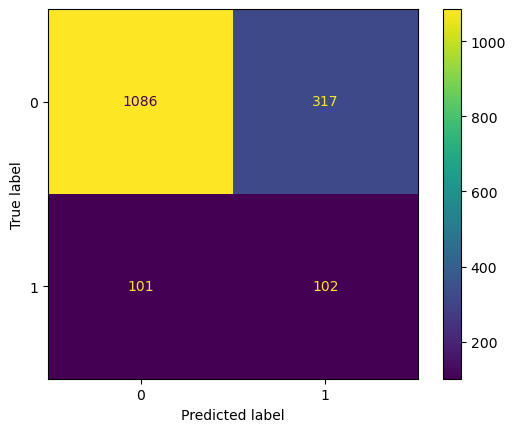

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_acc, pred, labels= knn_acc.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [111]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn) 

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.24343675417661098
Recall: 0.5024630541871922


- The important measure is Recall, because I predicted that there won't be an accident but actually there was, meaning FN 

# AdaBoost

In [143]:
ada_cla = AdaBoostClassifier(DecisionTreeClassifier(max_depth=30), n_estimators = 100)

In [144]:
ada_cla.fit(x_train_sm, y_train_sm)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=30),
                   n_estimators=100)

In [145]:
pred = ada_cla.predict(x_test_acc_scal)
ada_cla.score(x_test_acc_scal, y_test_acc)

0.800747198007472

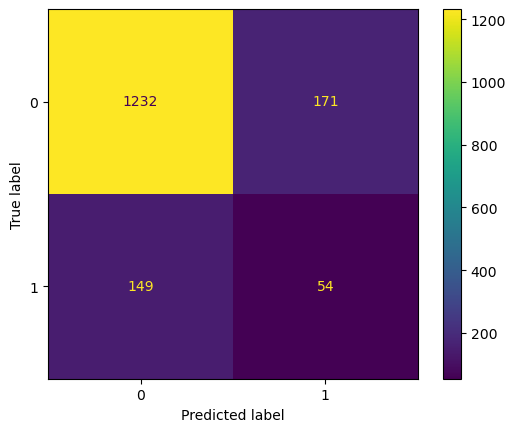

In [146]:
cm = confusion_matrix(y_test_acc, pred, labels= ada_cla.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [147]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.24
Recall: 0.2660098522167488


# Logistics Regression

In [130]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(x_train_sm, y_train_sm) 

In [131]:
pred = log_reg.predict(x_test_acc_scal)
log_reg.score(x_test_acc_scal, y_test_acc)

0.6755915317559154

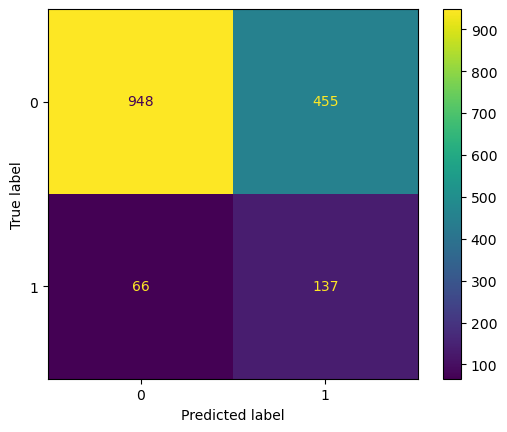

In [132]:
cm = confusion_matrix(y_test_acc, pred, labels= log_reg.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [133]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.23141891891891891
Recall: 0.6748768472906403


In [135]:
y_test_acc.value_counts()

0    1403
1     203
Name: no_of_accidents, dtype: int64

### - Highest Recall = 0.674 for the Logestic Regression Model with an Accuracy of 0.675

# Using Hyperparameter tuning for Logistic Regression

In [153]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'saga']}

In [160]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

In [161]:
grid_search.fit(x_train_sm, y_train_sm)

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ramya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ramya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [31]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params

{'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}

In [166]:
best_model = grid_search.best_estimator_

pred = best_model.predict(x_test_acc_scal)

In [167]:
accuracy = accuracy_score(y_test_acc, pred)
accuracy

0.6737235367372354

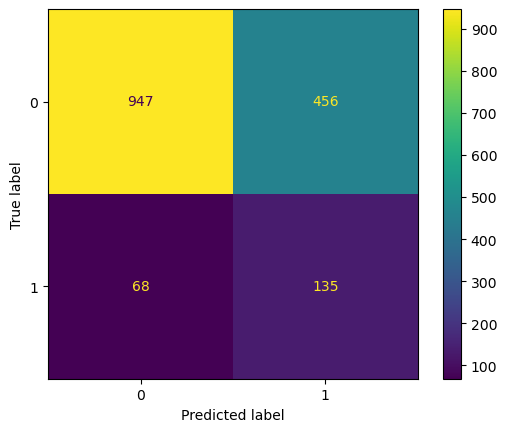

In [168]:
cm = confusion_matrix(y_test_acc, pred, labels= best_model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [169]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.22842639593908629
Recall: 0.6650246305418719


# Using Gradient Booster

In [148]:
gb_cla = GradientBoostingClassifier(max_depth = 350, n_estimators = 100)

In [149]:
gb_cla.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(max_depth=350)

In [150]:
pred = gb_cla.predict(x_test_acc_scal)
gb_cla.score(x_test_acc_scal, y_test_acc)

0.7602739726027398

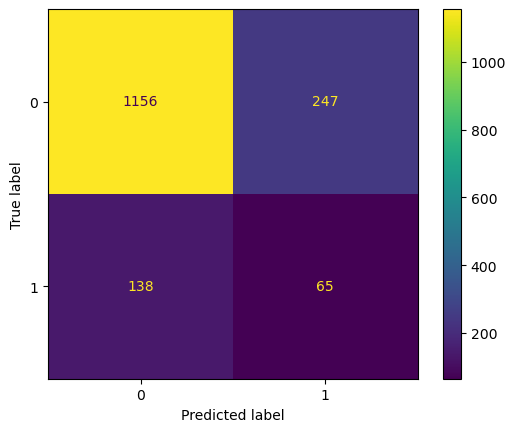

In [151]:
cm = confusion_matrix(y_test_acc, pred, labels= gb_cla.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [152]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.20833333333333334
Recall: 0.32019704433497537


# - Highest Recall = 0.674 for the Logestic Regression Model with an Accuracy of 0.675